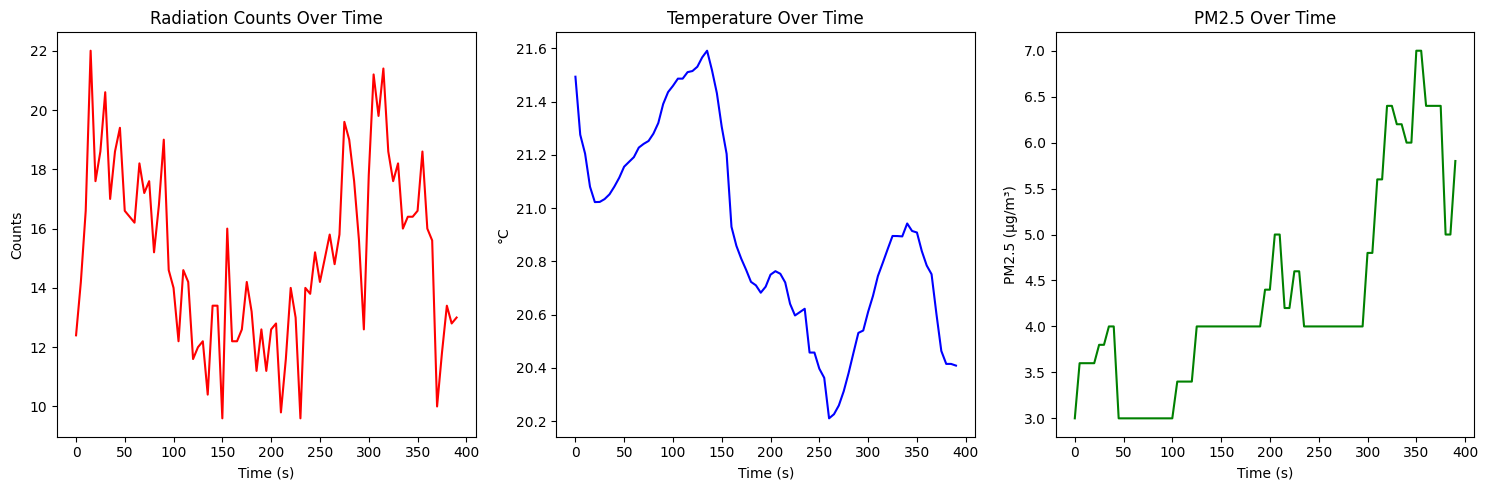

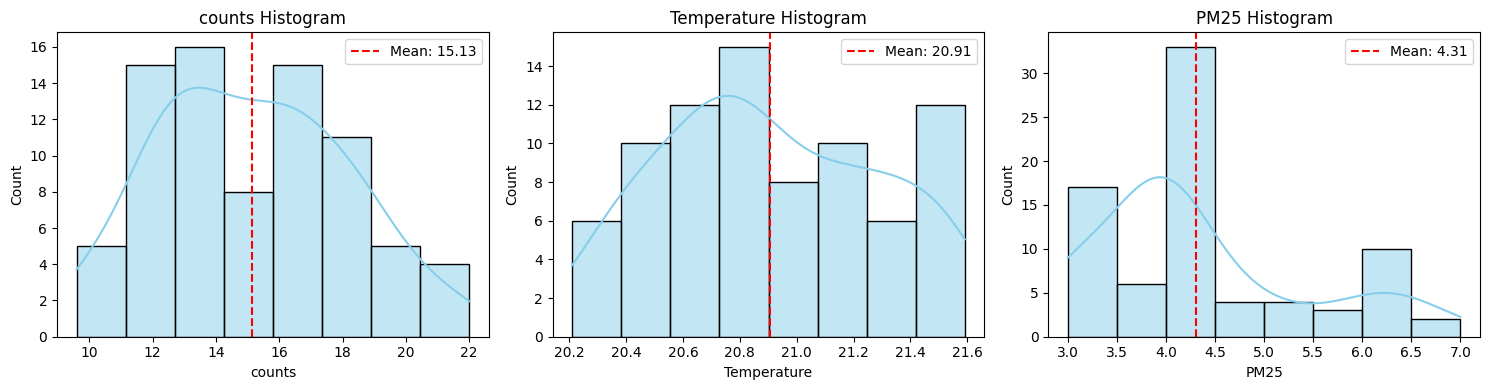

Summary Stats:
{'counts': {'mean': np.float64(15.131645569620249), 'std': 2.9811176833528985}, 'Temperature': {'mean': np.float64(20.907444125791134), 'std': 0.38120115857055903}, 'PM25': {'mean': np.float64(4.30886075949367), 'std': 1.0897176620242608}}

Normality Test (Shapiro-Wilk):
counts: W=0.9816, p-value=0.3107
Temperature: W=0.9619, p-value=0.0188
PM25: W=0.8614, p-value=0.0000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, shapiro

data = pd.read_csv("Loc1.csv")

data['Time'] = data['Time'] - data['Time'].min()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(data['Time'], data['counts'], color='red')
plt.title('Radiation Counts Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Counts')

plt.subplot(1, 3, 2)
plt.plot(data['Time'], data['Temperature'], color='blue')
plt.title('Temperature Over Time')
plt.xlabel('Time (s)')
plt.ylabel('°C')

plt.subplot(1, 3, 3)
plt.plot(data['Time'], data['PM25'], color='green')
plt.title('PM2.5 Over Time')
plt.xlabel('Time (s)')
plt.ylabel('PM2.5 (µg/m³)')

plt.tight_layout()
plt.show()

features = ['counts', 'Temperature', 'PM25']
plt.figure(figsize=(15, 4))
stats_summary = {}

for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[col], kde=True, color='skyblue')
    mean = data[col].mean()
    std = data[col].std()
    stats_summary[col] = {'mean': mean, 'std': std}
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.title(f"{col} Histogram")
    plt.legend()

plt.tight_layout()
plt.show()

normality_results = {col: shapiro(data[col]) for col in features}

print("Summary Stats:")
print(stats_summary)
print("\nNormality Test (Shapiro-Wilk):")
for col, result in normality_results.items():
    print(f"{col}: W={result.statistic:.4f}, p-value={result.pvalue:.4f}")


In [ ]:
# Part (c): Counting statistics

mean_counts = data['counts'].mean()
std_counts_measured = data['counts'].std()
std_counts_expected = np.sqrt(mean_counts)

print("=== Counting Statistics ===")
print(f"Mean counts: {mean_counts:.2f}")
print(f"Measured std dev: {std_counts_measured:.2f}")
print(f"Expected std dev from Poisson stats: {std_counts_expected:.2f}")


=== Counting Statistics ===
Mean counts: 15.13
Measured std dev: 2.98
Expected std dev from Poisson stats: 3.89


In [ ]:
# Part (d) and (e):
N_samples = len(data)
sigma_N = np.sqrt(mean_counts) / np.sqrt(2 * np.sqrt(N_samples))

print("\n=== CLT Uncertainty on Std Dev ===")
print(f"Uncertainty on std dev (σ_N): {sigma_N:.4f}")

deviation = abs(std_counts_measured - std_counts_expected)
is_excess_variation = deviation > sigma_N

print(f"Deviation from expected: {deviation:.4f}")
print(f"Is the deviation larger than uncertainty? {'Yes' if is_excess_variation else 'No'}")



=== CLT Uncertainty on Std Dev ===
Uncertainty on std dev (σ_N): 0.9226
Deviation from expected: 0.9088
Is the deviation larger than uncertainty? No



=== Radiation Stats by Location Group ===
                     mean       std  count       sem
location_group                                      
0               17.450000  2.282104     16  0.570526
1               13.700000  2.406657     16  0.601664
2               12.186667  1.325501     15  0.342243
3               16.362500  2.504629     16  0.626157
4               15.775000  2.941088     16  0.735272


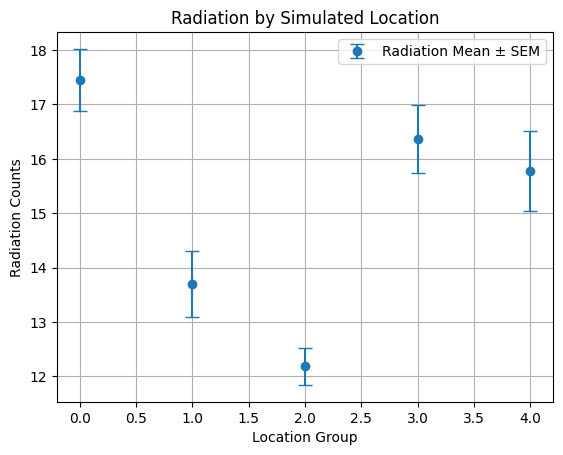

In [ ]:
data['location_group'] = pd.qcut(data['Time'], q=5, labels=False)

group_stats = data.groupby('location_group')['counts'].agg(['mean', 'std', 'count'])
group_stats['sem'] = group_stats['std'] / np.sqrt(group_stats['count'])

print("\n=== Radiation Stats by Location Group ===")
print(group_stats)

plt.errorbar(group_stats.index, group_stats['mean'], yerr=group_stats['sem'],
             fmt='o', capsize=5, label='Radiation Mean ± SEM')
plt.xlabel('Location Group')
plt.ylabel('Radiation Counts')
plt.title('Radiation by Simulated Location')
plt.grid(True)
plt.legend()
plt.show()


f questions:

group 2 is clearly lower than the other groups

here were seeing values 12-17 counts per 5 seconds which is much higher than typical background radiation

that might equate to an increase of 0.1 to 0.2 µSv/h, still within low-level exposure but not medically dangerous unless sustained for months or more. so not dangerous